In [73]:
import json
import numpy as np
import pandas as pd

In [74]:
with open('../EvolutionaryFramework/results/NSGA_II/2023_04_06_15:58:40/result_5.json') as user_file:
  parsed_json = json.load(user_file)
  
# print(json.dumps(parsed_json, indent = 4, sort_keys=True))

In [75]:
data = []
metaParameters = []
for elem in parsed_json:
    if elem == "metaParameters":
        metaParameters.append({
            'algorithmName': parsed_json[elem]["algorithmName"],
            'populationSize': parsed_json[elem]["populationSize"],
            'numberOfBars': parsed_json[elem]["numberOfBars"],
            'maxNumberOfNotes': parsed_json[elem]["maxNumberOfNotes"],
            'representationType': parsed_json[elem]["representationType"],
            'melodyKeyValue': parsed_json[elem]["melodyKeyValue"],
            'melodyKeyType': parsed_json[elem]["melodyKeyType"],
            'crossoverType': parsed_json[elem]["crossoverType"],
            'mutationType': parsed_json[elem]["mutationType"],
            'mutationProbability': parsed_json[elem]["mutationProbability"],
            'selectionType': parsed_json[elem]["selectionType"],
            'matingPoolSelectionType': parsed_json[elem]["matingPoolSelectionType"],
            'numberOfGenerations': parsed_json[elem]["numberOfGenerations"],
            'criteria': parsed_json[elem]["criteria"],
        })
metaParameters_df = pd.DataFrame(metaParameters)   


for elem in parsed_json:
        if elem == "experiment":
            for generation in parsed_json[elem]:
                for front in parsed_json[elem][generation]:
                    for individual in parsed_json[elem][generation][front]:
                        dictionary = {}
                        dictionary = {
                            'generation': generation,
                            'front': front,
                            'melody': individual['melody'],
                        }
                        for criterion in metaParameters_df['criteria'].values[0]:
                            dictionary[criterion] = individual['fitness'][criterion]
                        data.append(dictionary)
data_df = pd.DataFrame(data)

In [76]:
data_df.head()

,generation,front,melody,STABILITY,TENSION
0,generation_1000,front_2,61/0.0625 61/0.125 61/0.0625 73/0.125 73/0.125...,825.0,-455.0
1,generation_1000,front_2,71/0.0625 73/0.1875 84/0.125 73/0.0625 73/0.18...,170.0,10.0
2,generation_1000,front_2,71/0.0625 73/0.1875 73/0.125 73/0.0625 83/0.43...,615.0,-155.0
3,generation_1000,front_2,68/0.0625 61/0.1875 73/0.125 73/0.0625 73/0.18...,505.0,-75.0
4,generation_1000,front_2,59/0.0625 61/0.125 69/0.0625 73/0.25 73/0.0625...,610.0,-80.0


In [77]:
metaParameters_df.head()

,algorithmName,populationSize,numberOfBars,maxNumberOfNotes,representationType,melodyKeyValue,melodyKeyType,crossoverType,mutationType,mutationProbability,selectionType,matingPoolSelectionType,numberOfGenerations,criteria
0,NSGA-II,100,4,16,f1,A,MAJOR,ONE_POINT_CROSSOVER,SIMPLE,0.8,,,1000,"[STABILITY, TENSION]"


In [78]:
data_df.head()

,generation,front,melody,STABILITY,TENSION
0,generation_1000,front_2,61/0.0625 61/0.125 61/0.0625 73/0.125 73/0.125...,825.0,-455.0
1,generation_1000,front_2,71/0.0625 73/0.1875 84/0.125 73/0.0625 73/0.18...,170.0,10.0
2,generation_1000,front_2,71/0.0625 73/0.1875 73/0.125 73/0.0625 83/0.43...,615.0,-155.0
3,generation_1000,front_2,68/0.0625 61/0.1875 73/0.125 73/0.0625 73/0.18...,505.0,-75.0
4,generation_1000,front_2,59/0.0625 61/0.125 69/0.0625 73/0.25 73/0.0625...,610.0,-80.0


In [79]:
data_df.loc[0]

generation                                      generation_1000
front                                                   front_2
melody        61/0.0625 61/0.125 61/0.0625 73/0.125 73/0.125...
STABILITY                                                 825.0
TENSION                                                  -455.0
Name: 0, dtype: object

In [80]:
generation = data_df[data_df["generation"] == "generation_1000"].sort_values(by=['front'])

In [81]:
list_of_fronts = []
for front in generation["front"].unique():
    front_elements = []
    front_data = generation[generation["front"] == front]


    for criterion in metaParameters_df['criteria'].values[0]:
        front_temp = []
        for individual in front_data[criterion]:
            front_temp.append(individual)
        front_elements.append(front_temp)
    list_of_fronts.append(front_elements)


In [82]:
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

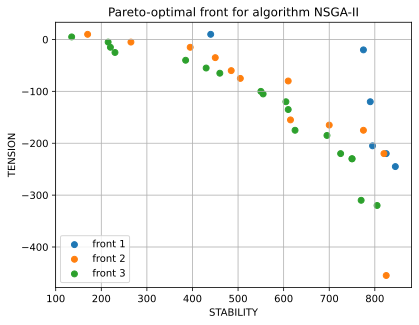

In [83]:
fig, ax = plt.subplots()
ax.set_title("Pareto-optimal front for algorithm NSGA-II")
for i, criterion in enumerate(metaParameters_df['criteria'].values[0]):
    if i == 0:
        ax.set_xlabel(criterion)
    else:
        ax.set_ylabel(criterion)
ax.grid()

for i, (x,y) in enumerate(list_of_fronts):
    ax.scatter(x, y, label = f"front {i+1}")

plt.legend()
plt.show()
